# About The Data
HR departments of companies would want to predict how likely are their employees decide to leave the company. Using different paremeters like Education, Experience and salary we can identify the chances of them leaving or not. We will use this dataset to create a regression model  to predict the likelihood of them leaving the company and also analysing the data to create graphs and charts.

In [ ]:
pip install requests
pip install "colorama>=0.3.8"
pip install future
pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

In [ ]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
min_mem_size=6 
run_time=222

In [ ]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

5


In [ ]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:49933 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.13" 2021-10-19; OpenJDK Runtime Environment (build 11.0.13+8-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.13+8-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpnhqfkux_
  JVM stdout: /tmp/tmpnhqfkux_/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpnhqfkux_/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:49933
Connecting to H2O server at http://127.0.0.1:49933 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.2
H2O_cluster_version_age:,9 days
H2O_cluster_name:,H2O_from_python_unknownUser_ss52is
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,27 mins 59 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.2
H2O_cluster_version_age:,9 days
H2O_cluster_name:,H2O_from_python_unknownUser_ev5e9h
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.058 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
url = "https://raw.githubusercontent.com/SathwikHegde/neu-mis-info6105-spring-2022_Assignment2_SathwikHegde/main/Employee.csv"
df = h2o.import_file(path = url)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
df.head()

Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
Bachelors,2017,Bangalore,3,34,Male,No,0,0
Bachelors,2013,Pune,1,28,Female,No,3,1
Bachelors,2014,New Delhi,3,38,Female,No,2,0
Masters,2016,Bangalore,3,27,Male,No,5,1
Masters,2017,Pune,3,24,Male,Yes,2,1
Bachelors,2016,Bangalore,3,22,Male,No,0,0
Bachelors,2015,New Delhi,3,38,Male,No,0,0
Bachelors,2016,Bangalore,3,34,Female,No,2,1
Bachelors,2016,Pune,3,23,Male,No,1,0
Masters,2017,New Delhi,2,37,Male,No,2,0


In [ ]:
df.types

{'Age': 'int',
 'City': 'enum',
 'Education': 'enum',
 'EverBenched': 'enum',
 'ExperienceInCurrentDomain': 'int',
 'Gender': 'enum',
 'JoiningYear': 'int',
 'LeaveOrNot': 'int',
 'PaymentTier': 'int'}

In [ ]:
df.describe()

Rows:4653
Cols:9




,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
type,enum,int,enum,int,int,enum,enum,int,int
mins,,2012.0,,1.0,22.0,,,0.0,0.0
mean,,2015.0629701267999,,2.6982591876208906,29.393294648613786,,,2.905652267354396,0.3438641736514077
maxs,,2018.0,,3.0,41.0,,,7.0,1.0
sigma,,1.8633768286863306,,0.5614354643364909,4.826087009126051,,,1.5582403309268564,0.47504747514881035
zeros,,0,,0,0,,,355,3053
missing,0,0,0,0,0,0,0,0,0
0,Bachelors,2017.0,Bangalore,3.0,34.0,Male,No,0.0,0.0
1,Bachelors,2013.0,Pune,1.0,28.0,Female,No,3.0,1.0
2,Bachelors,2014.0,New Delhi,3.0,38.0,Female,No,2.0,0.0


In [ ]:
df.shape


(4653, 9)

In [ ]:
# Create a 80/20 train/test split
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [ ]:
print(df_train.shape)
print(df_test.shape)

(3722, 9)
(931, 9)


In [ ]:
df_train.head()

Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
Bachelors,2013,Pune,1,28,Female,No,3,1
Bachelors,2014,New Delhi,3,38,Female,No,2,0
Bachelors,2016,Bangalore,3,22,Male,No,0,0
Bachelors,2015,New Delhi,3,38,Male,No,0,0
Bachelors,2016,Bangalore,3,34,Female,No,2,1
Bachelors,2016,Pune,3,23,Male,No,1,0
Masters,2017,New Delhi,2,37,Male,No,2,0
Bachelors,2016,Pune,3,34,Male,No,3,0
Bachelors,2012,Bangalore,3,37,Male,No,4,0
Bachelors,2014,Bangalore,3,34,Female,No,2,0


In [ ]:
# Set the features and target
X=df.columns
print(X)

['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender', 'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot']


In [ ]:
# Set target and predictor variables
# y ='churn'
y_numeric ='LeaveOrNot'
# X.remove(y) 
X.remove(y_numeric) 
print(X)

['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender', 'EverBenched', 'ExperienceInCurrentDomain']


In [ ]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [ ]:
aml.train(x=X,y=y_numeric,training_frame=df_train) 

AutoML progress: |
01:57:16.228: _response param, Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column to categorical before training.

█
01:57:19.236: _response param, Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column to categorical before training.

█
01:57:20.239: _response param, Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column to categorical before training.

██
01:57:24.242: _response param, Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column to categorical before t

In [ ]:
print(aml.leaderboard)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_BestOfFamily_4_AutoML_2_20220204_15716,0.114848,0.338892,0.114848,0.232734,0.238395
StackedEnsemble_AllModels_3_AutoML_2_20220204_15716,0.114957,0.339052,0.114957,0.233298,0.238368
GBM_grid_1_AutoML_2_20220204_15716_model_12,0.115528,0.339894,0.115528,0.233008,0.238995
StackedEnsemble_AllModels_2_AutoML_2_20220204_15716,0.115623,0.340034,0.115623,0.236845,0.239255
StackedEnsemble_AllModels_1_AutoML_2_20220204_15716,0.115873,0.340402,0.115873,0.237556,0.239835
GBM_grid_1_AutoML_2_20220204_15716_model_42,0.116021,0.340619,0.116021,0.242137,0.23923
GBM_grid_1_AutoML_2_20220204_15716_model_44,0.116118,0.340761,0.116118,0.233825,0.240217
StackedEnsemble_BestOfFamily_3_AutoML_2_20220204_15716,0.116166,0.340832,0.116166,0.237534,0.23971
GBM_grid_1_AutoML_2_20220204_15716_model_26,0.116283,0.341003,0.116283,0.235141,0.240916
StackedEnsemble_BestOfFamily_2_AutoML_2_20220204_15716,0.116338,0.341083,0.116338,0.237156,0.240465


In [ ]:
model_index=0
glm_index=0
glm_model=''
aml_leaderboard_df=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in aml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1     
models_dict

{'GBM_grid_1_AutoML_2_20220204_15716_model_12': 2,
 'GLM_1_AutoML_2_20220204_15716': 93,
 'StackedEnsemble_AllModels_3_AutoML_2_20220204_15716': 1,
 'StackedEnsemble_BestOfFamily_4_AutoML_2_20220204_15716': 0}

In [ ]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index,'model_id'])

2


In [ ]:
best_model.algo

'gbm'

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category = matplotlib.cbook.mplDeprecation)

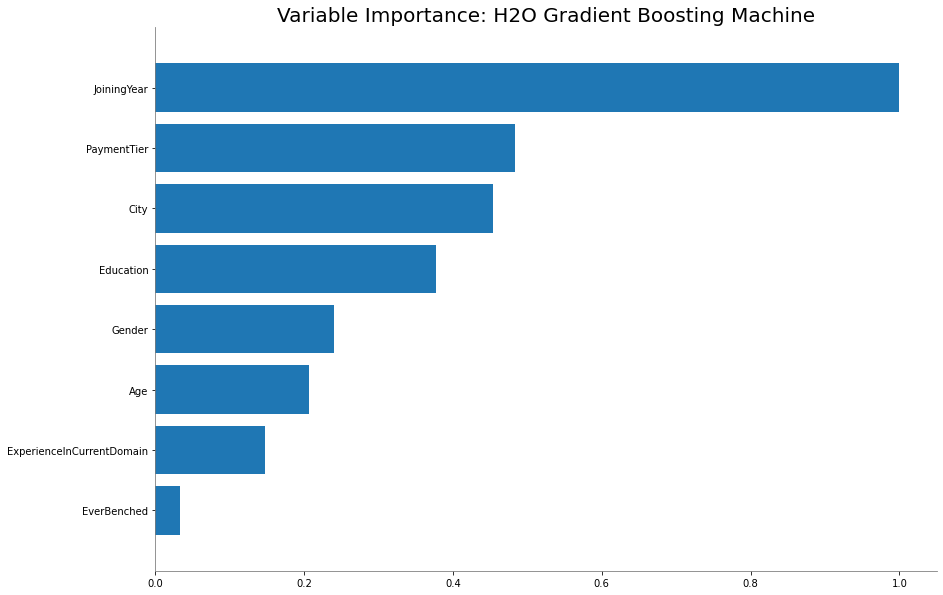

<Figure size 432x288 with 0 Axes>

In [ ]:
if best_model.algo in ['gbm','drf','xrt','xgboost']:
  best_model.varimp_plot()

93
glm


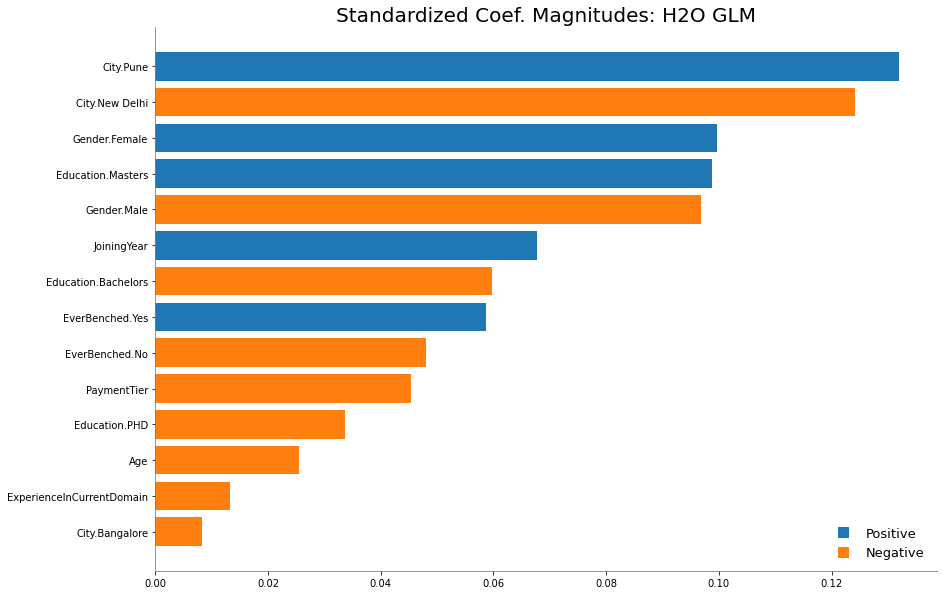

In [ ]:
if glm_index is not 0:
  print(glm_index)
  glm_model=h2o.get_model(aml.leaderboard[glm_index,'model_id'])
  print(glm_model.algo) 
  glm_model.std_coef_plot()

In [ ]:
print(best_model.rmse(train = True))

0.30264030218133786


In [ ]:
def model_performance_stats(perf):
    d={}
    try:    
      d['mse']=perf.mse()
    except:
      pass      
    try:    
      d['rmse']=perf.rmse() 
    except:
      pass      
    try:    
      d['null_degrees_of_freedom']=perf.null_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_degrees_of_freedom']=perf.residual_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_deviance']=perf.residual_deviance() 
    except:
      pass      
    try:    
      d['null_deviance']=perf.null_deviance() 
    except:
      pass      
    try:    
      d['aic']=perf.aic() 
    except:
      pass      
    try:
      d['logloss']=perf.logloss() 
    except:
      pass    
    try:
      d['auc']=perf.auc()
    except:
      pass  
    try:
      d['gini']=perf.gini()
    except:
      pass    
    return d

In [ ]:
mod_perf=best_model.model_performance(df_test)
stats_test={}
stats_test=model_performance_stats(mod_perf)
stats_test

{'mse': 0.1073305878882818,
 'null_degrees_of_freedom': None,
 'null_deviance': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'rmse': 0.32761347330090346}

In [ ]:
predictions = best_model.predict(df_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
y_pred=h2o.as_list(predictions)
y_pred[0:5]

,predict
0,0.210715
1,0.781190
2,0.458752
3,0.947231
4,0.983960


In [ ]:
y_test=h2o.as_list(df_test[y_numeric])
y_test[0:5]

,LeaveOrNot
0,0
1,1
2,1
3,1
4,1


In [ ]:
print(X)

['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender', 'EverBenched', 'ExperienceInCurrentDomain']


In [ ]:
best_model.partial_plot(df, cols=['PaymentTier'])

H2OResponseError: ignored